In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pickle
from git import Repo

# Get the git root directory
repo = Repo(".", search_parent_directories=True)
git_root = repo.git.rev_parse("--show-toplevel")

In [2]:
study = pickle.load(open(f"{git_root}/experiments/generating/AdaptableNNStudy.pkl", "rb"))

In [40]:
# Load the study
trials_df = study.trials_dataframe()
f1_scores = trials_df['values_0']
val_accuracys = trials_df['values_1']
dropout_probs = trials_df['params_dropout_prob']
n_layers = trials_df['params_n_layers']
n_units_0 = trials_df['params_n_units_l0']


   number  values_0  values_1             datetime_start  \
0       0  0.552372  0.470724 2025-01-03 17:33:37.186898   
1       1  0.567621  0.480921 2025-01-03 17:37:14.473784   
2       2  0.518019  0.456031 2025-01-03 17:41:55.922266   
3       3  0.002497  0.089693 2025-01-03 17:58:18.143554   
4       4  0.006300  0.085746 2025-01-03 18:00:01.376465   

           datetime_complete               duration  params_batchsize  \
0 2025-01-03 17:37:10.752097 0 days 00:03:33.565199               316   
1 2025-01-03 17:41:51.077035 0 days 00:04:36.603251               488   
2 2025-01-03 17:58:06.611354 0 days 00:16:10.689088                51   
3 2025-01-03 17:59:49.869368 0 days 00:01:31.725814               341   
4 2025-01-03 18:03:30.076343 0 days 00:03:28.699878               507   

   params_dropout_prob  params_epochs  params_layernorm  ...  \
0             0.357618             69             False  ...   
1             0.026622             69             False  ...   
2       

Parameter importances for objective_0:
{'n_layers': np.float64(0.312265180500831), 'n_units_l0': np.float64(0.29313832103631404), 'dropout_prob': np.float64(0.14597750002896553), 'learning_rate': np.float64(0.07836807611585755), 'leaky_relu_slope': np.float64(0.06788479670477178), 'batchsize': np.float64(0.05628400541533398), 'epochs': np.float64(0.024724325978225863), 'weight_decay': np.float64(0.019575087781595297), 'layernorm': np.float64(0.0017827064381048523)}
Parameter importances for objective_1:
{'n_units_l0': np.float64(0.3744251363135801), 'n_layers': np.float64(0.1853390849413689), 'dropout_prob': np.float64(0.15744621457990088), 'batchsize': np.float64(0.07412446261536433), 'leaky_relu_slope': np.float64(0.07169878386621567), 'epochs': np.float64(0.06701315596358574), 'learning_rate': np.float64(0.05830353051866706), 'weight_decay': np.float64(0.010316584409941359), 'layernorm': np.float64(0.0013330467913759837)}


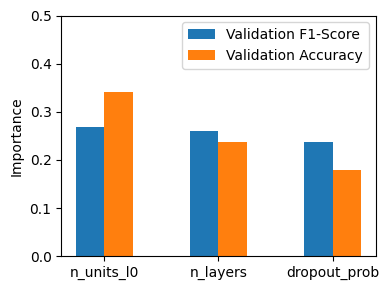

In [41]:
import optuna

param_importances_0 = optuna.importance.get_param_importances(study, target=lambda t: t.values[0])
print("Parameter importances for objective_0:")
print(param_importances_0)

param_importances_1 = optuna.importance.get_param_importances(study, target=lambda t: t.values[1])
print("Parameter importances for objective_1:")
print(param_importances_1)

sorted_importances = {k: v for k, v in sorted(param_importances_0.items(), key=lambda item: item[1], reverse=True)}

# Consider only the first 3 parameters
top_params = list(sorted_importances.keys())[:3]
top_importances = {key: sorted_importances[key] for key in top_params}

# Plotting top 3 parameter importances
fig, ax = plt.subplots(figsize=(4, 3))
bar_width = 0.25
index = np.arange(len(top_importances))


bar1 = ax.bar(index, [val[0] for val in top_importances.values()], bar_width, label='Validation F1-Score')
bar2 = ax.bar(index + bar_width, [val[1] for val in top_importances.values()], bar_width, label='Validation Accuracy')
ax.set_ylabel('Importance')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(top_importances.keys())
ax.legend()
ax.set_ylim(0, 0.5)

plt.tight_layout()
plt.show()

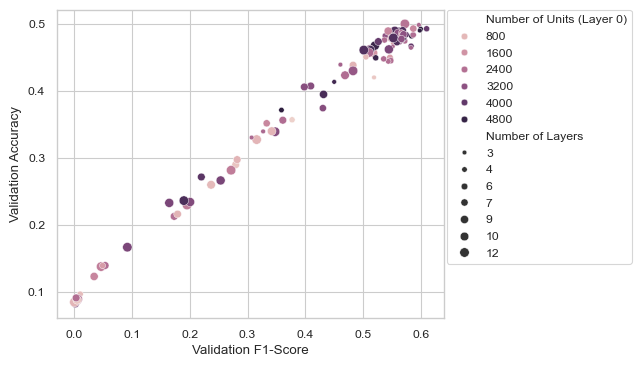

In [109]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 4))

scatter = sns.scatterplot(data=trials_df, x="values_0", y="values_1", hue="params_n_units_l0", size="params_n_layers", ax=ax, legend="auto")
scatter.legend(loc="upper right", bbox_to_anchor=(1.45, 1), scatterpoints=1, markerscale=1, title="Legend", title_fontsize='13', fontsize='10')
sns.set_style("whitegrid")
ax.set_ylabel("Validation Accuracy")
ax.set_xlabel("Validation F1-Score")

# Change the labels for hue and size in the legend
handles, labels = scatter.get_legend_handles_labels()
for i, label in enumerate(labels):
    if label.startswith("params_n_units_l0"):
        labels[i] = label.replace("params_n_units_l0", "Number of Units (Layer 0)")
    elif label.startswith("params_n_layers"):
        labels[i] = label.replace("params_n_layers", "Number of Layers")

scatter.legend(handles, labels, loc="upper right", bbox_to_anchor=(1.5, 1.02), scatterpoints=1, markerscale=1)

plt.show()


